In [55]:
import numpy as np
import pandas as pd

In [56]:
df = pd.read_csv('Admission_Predict2.csv')

In [57]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [58]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [59]:
df.drop(columns = ['Serial No.'] , inplace= True)

In [60]:
df.duplicated().sum()

0

In [61]:
x = df.iloc[: , : -1]
y = df.iloc[: , -1]

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 12)

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [66]:
x_train_scaled.shape

(400, 7)

In [67]:
import tensorflow 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [68]:
model = Sequential()
model.add(Dense(7 , activation = 'relu' , input_dim = 7))
model.add(Dense(7 , activation = 'relu'))
model.add(Dense(1 , activation = 'linear'))

In [69]:
model.compile(loss = 'mean_squared_error' , optimizer = 'Adam' , metrics = ['accuracy'])

In [70]:
history = model.fit(x_train_scaled , y_train , validation_split = 0.2 , epochs = 100)

Epoch 1/100
10/10 [==============================] - 1s 18ms/step - loss: 0.7657 - accuracy: 0.0000e+00 - val_loss: 0.6650 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5707 - accuracy: 0.0000e+00 - val_loss: 0.4823 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3984 - accuracy: 0.0000e+00 - val_loss: 0.3241 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2504 - accuracy: 0.0000e+00 - val_loss: 0.1788 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1196 - accuracy: 0.0000e+00 - val_loss: 0.0721 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0545 - accuracy: 0.0000e+00 - val_loss: 0.0435 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0433 - accuracy: 0.0000e+00 - 

In [71]:
y_pred = model.predict(x_test_scaled)

4/4 [==============================] - 0s 4ms/step


In [72]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)

0.5885422201914949

In [73]:
import matplotlib.pyplot as plt

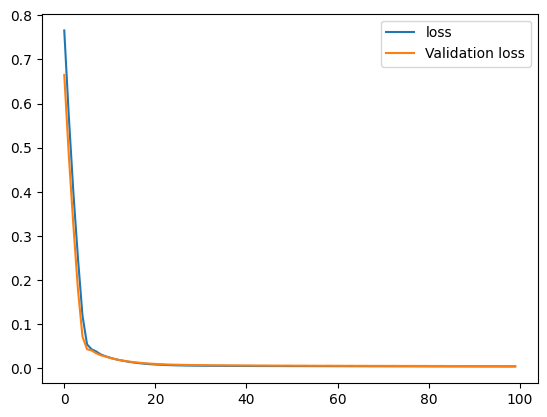

In [77]:
plt.plot(history.history['loss'] , label = 'loss')
plt.plot(history.history['val_loss'] , label = 'Validation loss')
plt.legend()

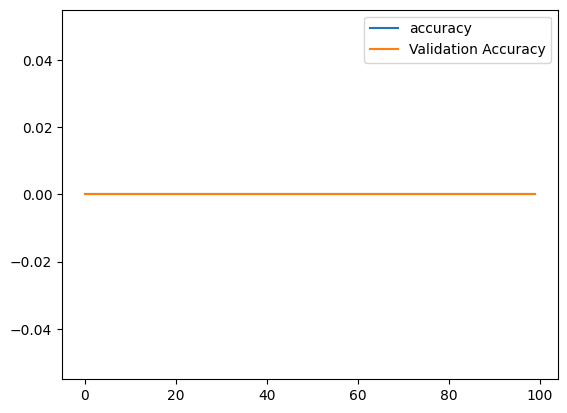

In [75]:
plt.plot(history.history['accuracy'] , label = 'accuracy')
plt.plot(history.history['val_accuracy'] , label= 'Validation Accuracy')
plt.legend()